In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
df = pd.read_csv('분석용.xlsx - 시트1 (1).csv')

In [3]:
df.columns

Index(['현재 몇학년이신가요? (4학년 이상은 4학년에 체크)', '학부는 어디인가요?', 'Unnamed: 2',
       '어느 도시에서 공부하고 있나요?', '나라 레이블', '당신의 도시나 나라에서 ChatGPT는 금지되었나요?',
       '대학에서 ChatGPT 사용이 금지되었나요?', 'ChatGPT 사용에 익숙하신가요?',
       '학문적 작업에 ChatGPT를 사용해본 적이 있나요?', '주당 공부 시간은 얼마나 되나요?',
       'ChatGPT를 제외한 공부 도구 중 가장 자주 사용하는 것은 무엇인가요?', '그 도구의 단점은 무엇인가요?',
       '공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [집중도 향상]',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [효율적인 학습]',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [창의력]',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [동기부여]',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [시간절약]',
       '다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Being overdependent]',
       '다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Lack of creativity]',
       '다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Induce laziness or deteriorate motivation]',
  

## 현재 몇학년이신가요?': 막대 그래프 또는 파이 차트를 사용하여 학년별 응답 수를 시각화할 수 있습니다.

<Axes: >

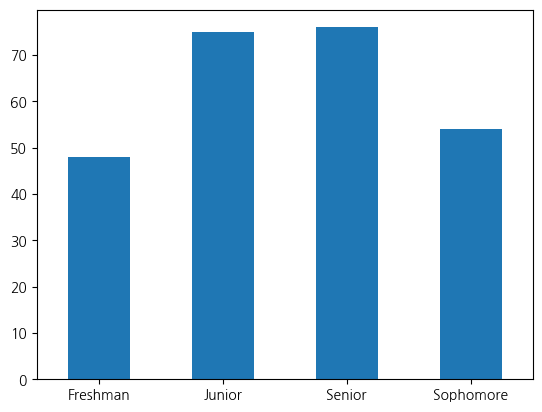

In [4]:
df['현재 몇학년이신가요? (4학년 이상은 4학년에 체크)'].value_counts().sort_index().plot(kind='bar', rot=0)

## '학부는 어디인가요?': 가장 많이 선택된 학부 상위 5개를 수평 막대 그래프로 시각화하거나, 학부별 응답 수를 원 그래프로 나타낼 수 있습니다.


<Axes: >

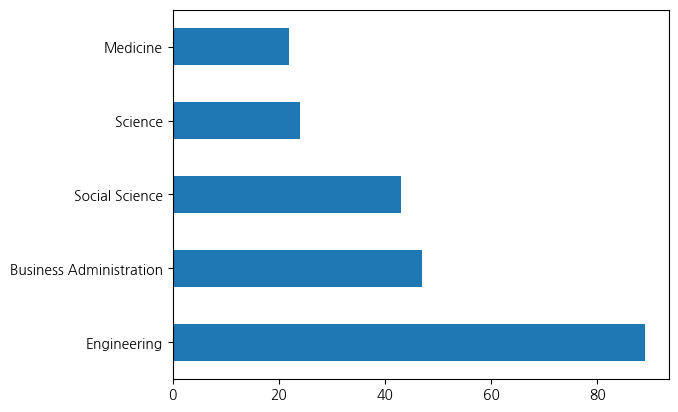

In [5]:
# '학부는 어디인가요?' 열을 기준으로 응답 수를 세기
value_counts = df['학부는 어디인가요?'].value_counts().nlargest(5)

# 수평 막대 그래프 그리기
value_counts.plot.barh()

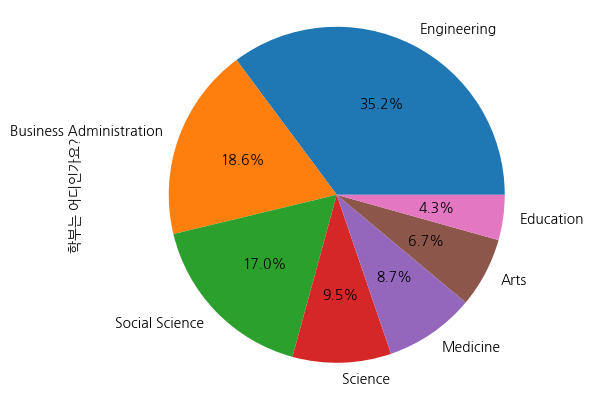

In [6]:
# '학부는 어디인가요?' 컬럼 시각화 (원 그래프)

df['학부는 어디인가요?'].value_counts().plot(kind='pie', autopct='%1.1f%%', legend=False)
plt.axis('equal')
plt.show()

## '나라 레이블': 막대 그래프나 파이 차트를 사용하여 각 나라의 응답 수를 시각화할 수 있습니다.


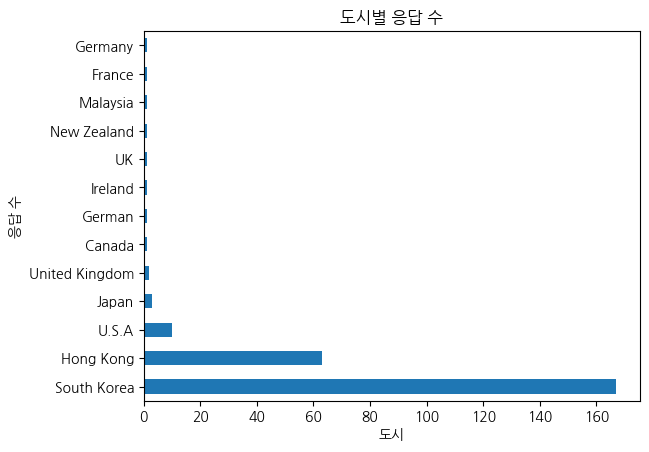

In [7]:
df['나라 레이블'].value_counts().plot(kind='barh')
plt.xlabel('도시')
plt.ylabel('응답 수')
plt.title('도시별 응답 수')
plt.show()

## '당신의 도시나 나라에서 ChatGPT는 금지되었나요?': 파이 차트를 사용하여 금지 여부에 따른 응답 수를 비교할 수 있습니다.


<Axes: >

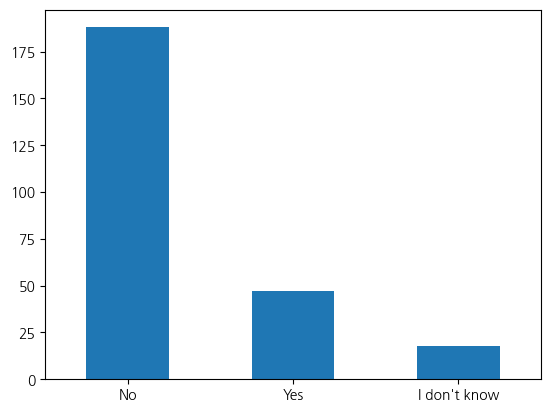

In [8]:
df['당신의 도시나 나라에서 ChatGPT는 금지되었나요?'].value_counts().plot(kind='bar', rot=0)

In [9]:
df.groupby('나라 레이블')['당신의 도시나 나라에서 ChatGPT는 금지되었나요?'].value_counts()

나라 레이블          당신의 도시나 나라에서 ChatGPT는 금지되었나요?
Canada          No                                 1
France          No                                 1
German          No                                 1
Germany         I don't know                       1
Hong Kong       Yes                               45
                No                                10
                I don't know                       8
Ireland         No                                 1
Japan           No                                 3
Malaysia        No                                 1
New Zealand     No                                 1
South Korea     No                               157
                I don't know                       8
                Yes                                2
U.S.A           No                                 9
                I don't know                       1
UK              No                                 1
United Kingdom  No                                 2


In [10]:
grouped_counts = df.groupby('나라 레이블')['당신의 도시나 나라에서 ChatGPT는 금지되었나요?'].value_counts()
filtered_counts = grouped_counts[grouped_counts > 1]
filtered_df = df[df['나라 레이블'].isin(filtered_counts.index.get_level_values(0))]


In [11]:
total_counts = filtered_counts.groupby('나라 레이블').sum()
ratios = filtered_counts / total_counts

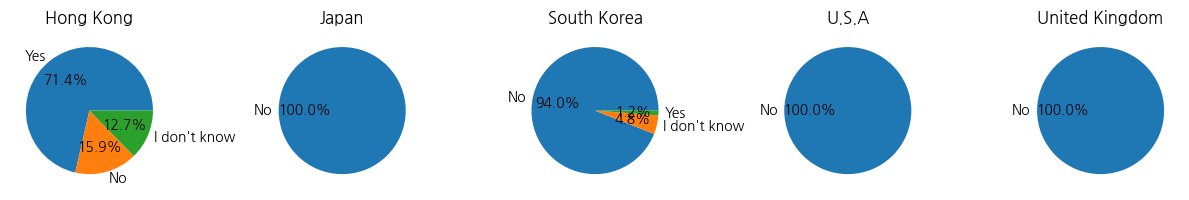

In [12]:
import matplotlib.pyplot as plt

# 나라별로 서브플롯 생성
countries = ratios.index.get_level_values(0).unique()
num_countries = len(countries)
fig, axes = plt.subplots(nrows=1, ncols=num_countries, figsize=(12, 4))

# 나라별 파이 차트 그리기
for i, country in enumerate(countries):
    country_ratios = ratios[country]
    ax = axes[i]
    ax.pie(country_ratios, labels=country_ratios.index, autopct='%1.1f%%')
    ax.set_title(country)

plt.tight_layout()
plt.show()

## '대학에서 ChatGPT 사용이 금지되었나요?': 파이 차트를 사용하여 사용 금지 여부에 따른 응답 수를 시각화할 수 있습니다.


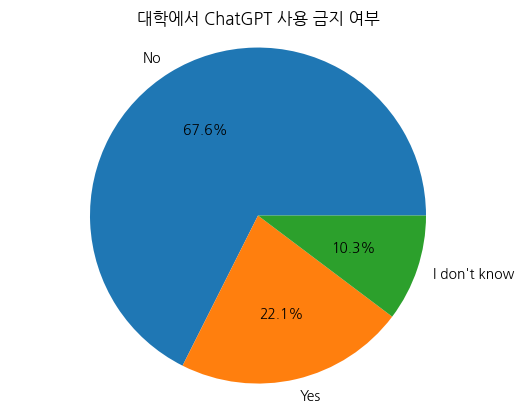

In [13]:
# '대학에서 ChatGPT 사용이 금지되었나요?' 열을 기준으로 응답 수를 세기
value_counts = df['대학에서 ChatGPT 사용이 금지되었나요?'].value_counts()

# 파이 차트 그리기
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('대학에서 ChatGPT 사용 금지 여부')
plt.axis('equal')  # 파이 차트를 원형으로 표현
plt.show()



## 'ChatGPT 사용에 익숙하신가요?': 막대 그래프를 사용하여 익숙함 수준을 표현할 수 있습니다.


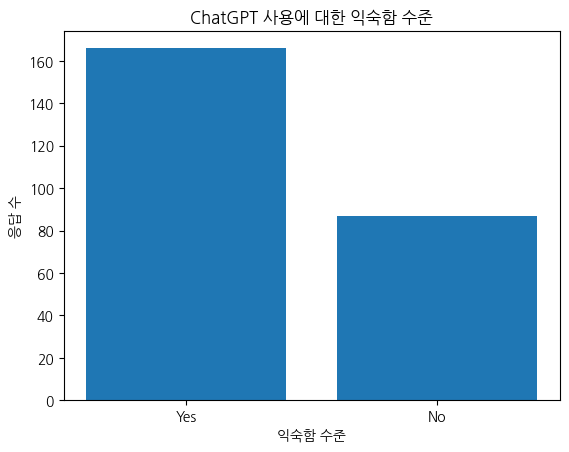

In [14]:
# 'ChatGPT 사용에 익숙하신가요?' 열을 기준으로 응답 수를 세기
value_counts = df['ChatGPT 사용에 익숙하신가요?'].value_counts()

# 막대 그래프 그리기
plt.bar(value_counts.index, value_counts)
plt.title('ChatGPT 사용에 대한 익숙함 수준')
plt.xlabel('익숙함 수준')
plt.ylabel('응답 수')
plt.show()

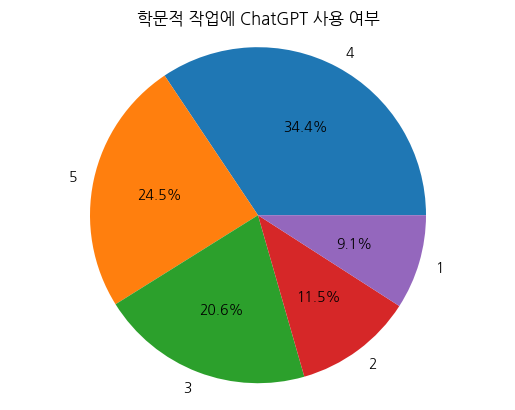

In [15]:
# '학문적 작업에 ChatGPT를 사용해본 적이 있나요?' 열을 기준으로 응답 수를 세기
value_counts = df['학문적 작업에 ChatGPT를 사용해본 적이 있나요?'].value_counts()

# 파이 차트 그리기
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('학문적 작업에 ChatGPT 사용 여부')
plt.axis('equal')  # 파이 차트를 원형으로 표현
plt.show()

대학에서 ChatGPT 사용이 금지되었나요?       I don't know   No  Yes
당신의 도시나 나라에서 ChatGPT는 금지되었나요?                        
I don't know                              8    6    4
No                                       16  159   13
Yes                                       2    6   39


<Axes: xlabel='대학에서 ChatGPT 사용이 금지되었나요?', ylabel='당신의 도시나 나라에서 ChatGPT는 금지되었나요?'>

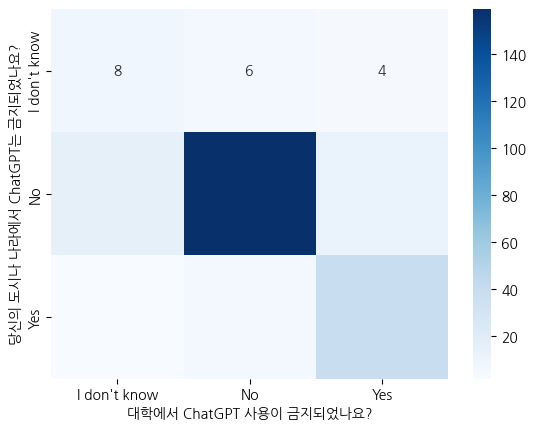

In [16]:
ban_agree_cross = pd.crosstab(df['당신의 도시나 나라에서 ChatGPT는 금지되었나요?'], df['대학에서 ChatGPT 사용이 금지되었나요?'])
print(ban_agree_cross)

# 시각화
sns.heatmap(ban_agree_cross, annot=True, fmt='d', cmap='Blues')
# plt.title('ChatGPT 사용 금지 여부와 대학에서의 사용 금지 정책에 대한 동의 여부')
# plt.xlabel('대학에서 ChatGPT 사용 금지')
# plt.ylabel('도시나 나라에서 ChatGPT 금지')
# plt.show()

## 주당 공부시간

<Axes: >

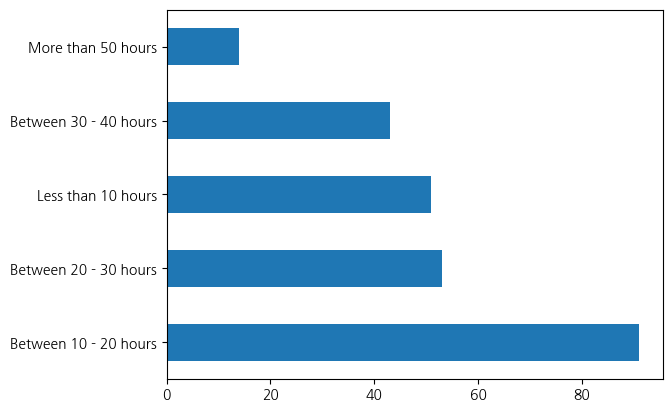

In [17]:
df['주당 공부 시간은 얼마나 되나요?'].value_counts()[:5].plot.barh()

<Axes: >

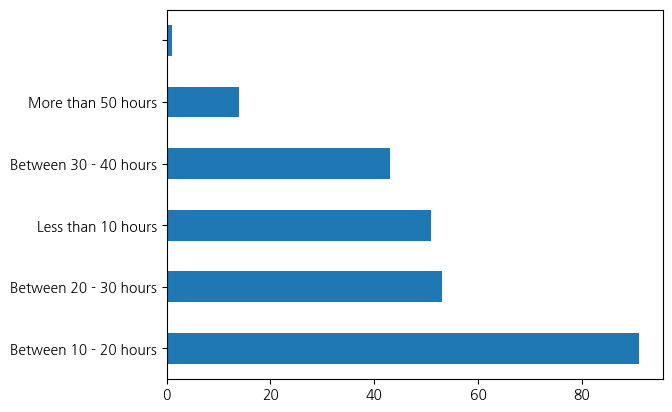

In [18]:
df['주당 공부 시간은 얼마나 되나요?'].value_counts().plot.barh()

<Axes: ylabel='학문적 작업에 ChatGPT를 사용해본 적이 있나요?,주당 공부 시간은 얼마나 되나요?'>

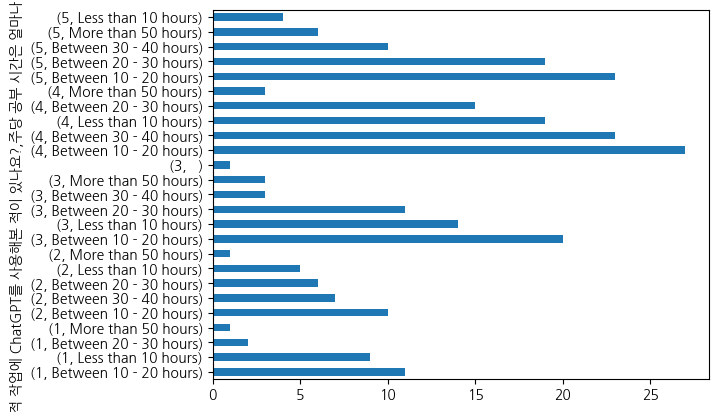

In [19]:
df.groupby('학문적 작업에 ChatGPT를 사용해본 적이 있나요?')['주당 공부 시간은 얼마나 되나요?'].value_counts().plot.barh()

## 학습 도구로의 사용

<Axes: >

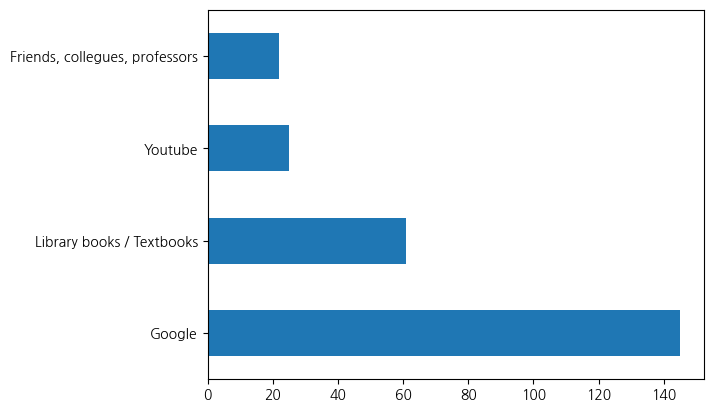

In [20]:
df['ChatGPT를 제외한 공부 도구 중 가장 자주 사용하는 것은 무엇인가요?'].value_counts().plot.barh()

In [21]:
df['그 도구의 단점은 무엇인가요?'].str.split(',')

0                                [Incorrect information]
1      [Time consuming,  Irrelevant information,  Too...
2        [Irrelevant information,  Too much information]
3                                [Incorrect information]
4                               [Irrelevant information]
                             ...                        
248              [Time consuming,  Too much information]
249              [Time consuming,  Too much information]
250              [Time consuming,  Too much information]
251              [Time consuming,  Too much information]
252    [Time consuming,  Irrelevant information,  Too...
Name: 그 도구의 단점은 무엇인가요?, Length: 253, dtype: object

In [22]:
words = []
for item in df['그 도구의 단점은 무엇인가요?']:
    item = item.strip("[]")  # 대괄호 제거
    words.extend(item.split(", "))  # 쉼표를 기준으로 단어 분리

<Axes: ylabel='0'>

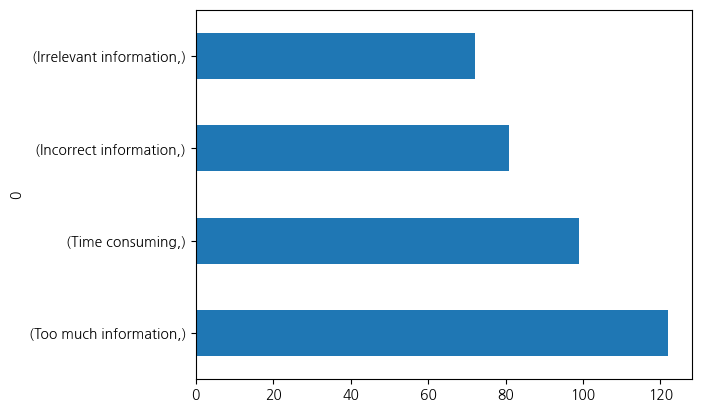

In [23]:
pd.DataFrame(words).value_counts()[:4].plot.barh()

In [24]:
# 워드 클라우드로 생성
df['공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?']

0                       To have conversations when bored
1                                       Content creation
2      Better organization of information than search...
3                              When coming up with ideas
4      Provides quick answers, can also provide guidance
                             ...                        
248                       Research and understand topics
249                                                  NaN
250                                              Nothing
251               I don't use ChatGPT for other purposes
252                                              I don't
Name: 공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?, Length: 253, dtype: object

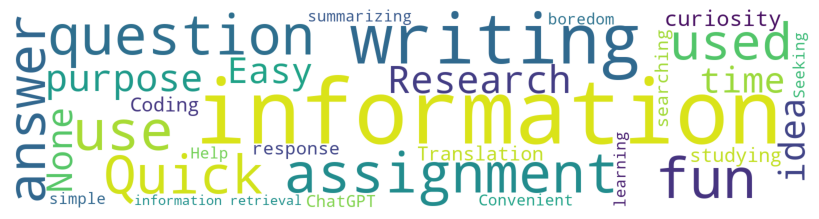

In [25]:
# 필요한 라이브러리를 불러옵니다.
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 데이터를 불러옵니다. 이 예제에서는 df라는 DataFrame이 이미 있습니다.
# df = pd.read_csv('your_file.csv')

# '공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유' 컬럼의 텍스트를 모두 결합합니다.
text = ' '.join(df['공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?'].astype(str))

# 워드 클라우드를 생성합니다.
wordcloud = WordCloud(max_words=30, width=1600, height=400, background_color='white').generate(text)

# 워드 클라우드를 시각화합니다.
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [26]:
word_frequencies = wordcloud.words_

# Print the word frequencies.
for word, freq in word_frequencies.items():
    print(f'Word: {word}, Frequency: {freq}')


Word: information, Frequency: 1.0
Word: writing, Frequency: 0.8333333333333334
Word: fun, Frequency: 0.5
Word: use, Frequency: 0.5
Word: assignment, Frequency: 0.5
Word: question, Frequency: 0.5
Word: Quick, Frequency: 0.4583333333333333
Word: answer, Frequency: 0.4583333333333333
Word: used, Frequency: 0.4166666666666667
Word: Research, Frequency: 0.375
Word: purpose, Frequency: 0.375
Word: time, Frequency: 0.3333333333333333
Word: Easy, Frequency: 0.3333333333333333
Word: None, Frequency: 0.3333333333333333
Word: idea, Frequency: 0.3333333333333333
Word: curiosity, Frequency: 0.2916666666666667
Word: studying, Frequency: 0.2916666666666667
Word: Coding, Frequency: 0.2916666666666667
Word: Translation, Frequency: 0.2916666666666667
Word: searching, Frequency: 0.25
Word: response, Frequency: 0.25
Word: ChatGPT, Frequency: 0.20833333333333334
Word: summarizing, Frequency: 0.20833333333333334
Word: learning, Frequency: 0.20833333333333334
Word: Convenient, Frequency: 0.20833333333333334


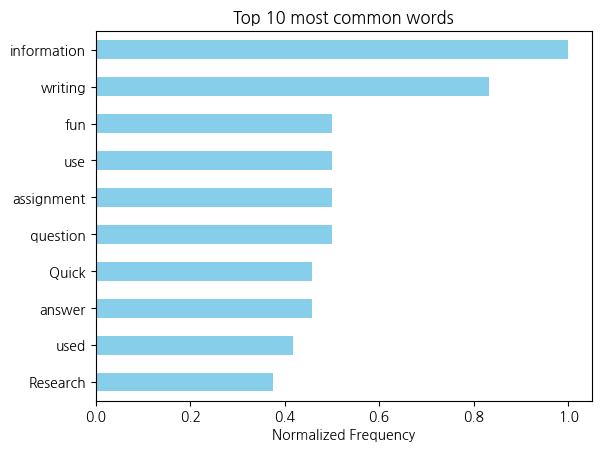

In [27]:
# Convert the dictionary to a DataFrame
df_word_freq = pd.DataFrame.from_dict(word_frequencies, orient='index', columns=['Frequency'])

# Sort the DataFrame by frequency in descending order
df_word_freq = df_word_freq.sort_values('Frequency', ascending=False)

# Select the top 10 words
df_top_10 = df_word_freq.head(10)

# Plot the bar graph of the top 10 words
df_top_10.plot(kind='barh', legend=False, color='skyblue')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest frequency word at the top.
plt.xlabel('Normalized Frequency')
plt.title('Top 10 most common words')
plt.show()

In [28]:
# word : 'information'
df[df['공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?'].fillna('').str.contains('information')]['공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?']

2      Better organization of information than search...
7                            Quick information retrieval
21                            Fast information retrieval
25                               Quick information check
32     Mainly used to check the presence of specific ...
41                 Easy editing of extensive information
47     To get more detailed information about curious...
56               Quick access to approximate information
66     Short time, vast information, comparative anal...
89                           Quick information retrieval
96                     Efficient for finding information
107                            Searching for information
122        When quick information organization is needed
136                         Gathering simple information
142                   Finding needed information quickly
143    Finding information, data analysis, write basi...
150            Organizing content or seeking information
154                    Centrali

In [29]:
# word : writing
df[df['공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?'].fillna('').str.contains('writing')]['공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?']

8      For fun with friends or writing informative ar...
14     Used when writing, especially to make writing ...
19                                   Quick draft writing
27                                          Blog writing
33        Scriptwriting, discussion of curious questions
40                        Resume or cover letter writing
98                                  To help with writing
108                    To create a structure for writing
162    Generating new ideas (product names, copywriting)
173                       Convenient for program writing
197    Used to reference scholars' opinions or change...
200          Writing self-introductions, writing scripts
211                       writing essay, searching tools
Name: 공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?, dtype: object

In [30]:
# word : fun
df[df['공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?'].fillna('').str.contains('fun')]['공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?']

8      For fun with friends or writing informative ar...
35                             For fun and entertainment
43                      Curiosity resolution, simple fun
85                                               For fun
102                                     Because it's fun
147                                For fun conversations
188    Easy way to get light answers, and also for fu...
194                             For fun (out of boredom)
213                                              for fun
240                                             For fun 
Name: 공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?, dtype: object

## 장점

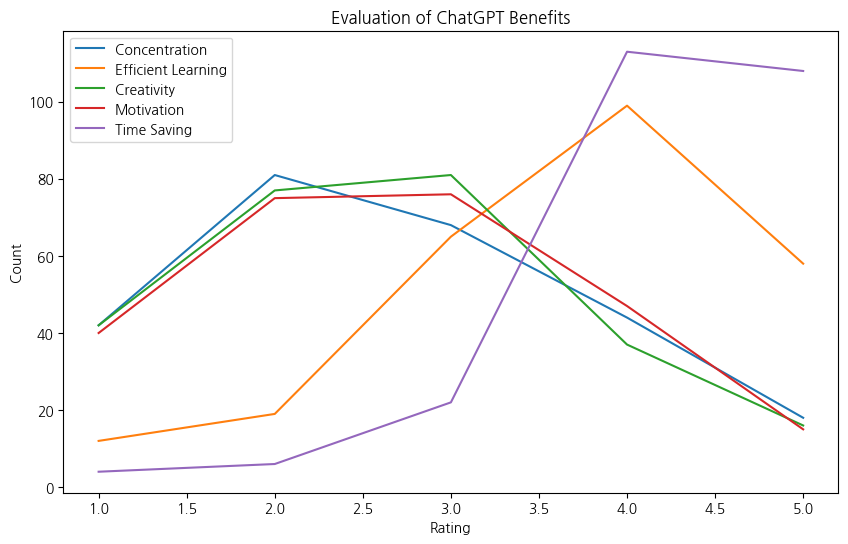

In [31]:
# 데이터 준비
concentration = df['다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [집중도 향상]'].value_counts().sort_index()
efficient_learning = df['다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [효율적인 학습]'].value_counts().sort_index()
creativity = df['다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [창의력]'].value_counts().sort_index()
motivation = df['다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [동기부여]'].value_counts().sort_index()
time_saving = df['다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [시간절약]'].value_counts().sort_index()
# 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(concentration, label='Concentration')
plt.plot(efficient_learning, label='Efficient Learning')
plt.plot(creativity, label='Creativity')
plt.plot(motivation, label='Motivation')
plt.plot(time_saving, label='Time Saving')

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Evaluation of ChatGPT Benefits')
plt.legend()
plt.show()


## 단점 

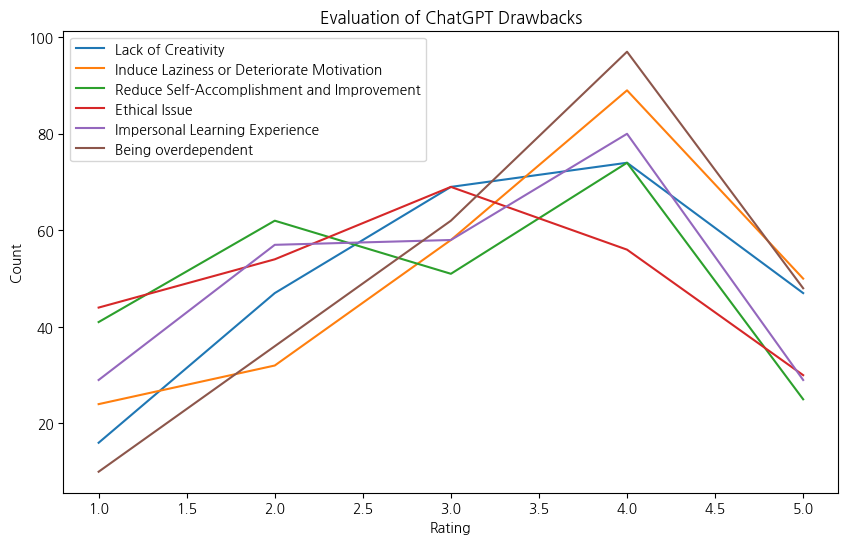

In [32]:
# 데이터 준비
lack_of_creativity = df['다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Lack of creativity]'].value_counts().sort_index()
induce_laziness = df['다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Induce laziness or deteriorate motivation]'].value_counts().sort_index()
reduce_self_improvement = df['다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Reduce self-accomplishment and improvement]'].value_counts().sort_index()
ethical_issue = df['다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Ethical issue]'].value_counts().sort_index()
impersonal_experience = df['다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Impersonal learning experience]'].value_counts().sort_index()
overdependent = df['다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Being overdependent]'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(10,6))
plt.plot(lack_of_creativity, label='Lack of Creativity')
plt.plot(induce_laziness, label='Induce Laziness or Deteriorate Motivation')
plt.plot(reduce_self_improvement, label='Reduce Self-Accomplishment and Improvement')
plt.plot(ethical_issue, label='Ethical Issue')
plt.plot(impersonal_experience, label='Impersonal Learning Experience')
plt.plot(overdependent, label='Being overdependent')

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Evaluation of ChatGPT Drawbacks')
plt.legend()
plt.show()

## GPT 대학 교육 적합성

<Axes: >

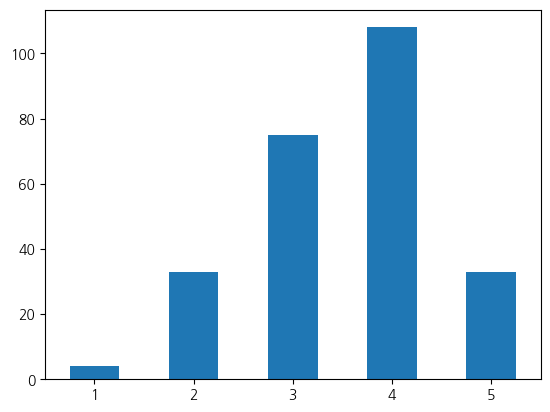

In [33]:
#  'ChatGPT는 학문적으로 적합하다', '대학에서 ChatGPT 사용이 금지된다면, 이 정책에 동의하시나요?',
df['ChatGPT는 학문적으로 적합하다'].value_counts().sort_index().plot.bar(rot=0)

<Axes: >

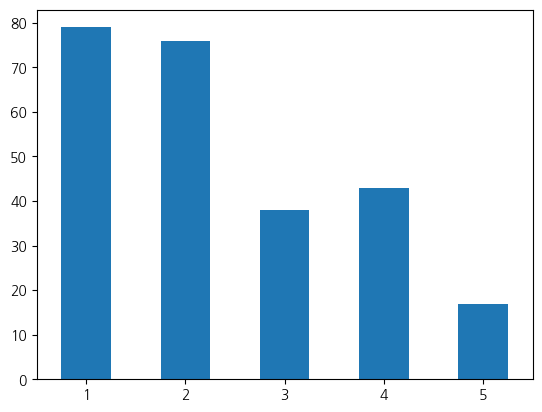

In [34]:
df['대학에서 ChatGPT 사용이 금지된다면, 이 정책에 동의하시나요?'].value_counts().sort_index().plot.bar(rot=0)

<Axes: >

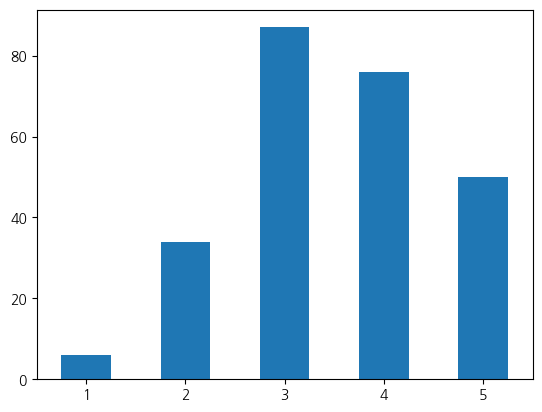

In [35]:
# '대학은 ChatGPT 사용을 장려해야 한다', '대학은 ChatGPT 사용법 교육을 제공해야 한다'
df['대학은 ChatGPT 사용을 장려해야 한다'].value_counts().sort_index().plot.bar(rot=0)

In [36]:
def plot_value_counts(df, column):
    """
    Create a bar plot for the value counts of the specified column in df.
    
    Parameters:
    df (pandas.DataFrame): The pandas DataFrame.
    column (str): The column name.
    """
    # 값의 빈도를 계산하고 인덱스로 정렬
    value_counts = df[column].value_counts().sort_index()
    
    # 바 차트 생성
    value_counts.plot.bar(rot=0)
    
    # 그래프에 제목과 레이블 추가
    plt.title(f'Value Counts of {column}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    
    # 그래프 출력
    plt.show()

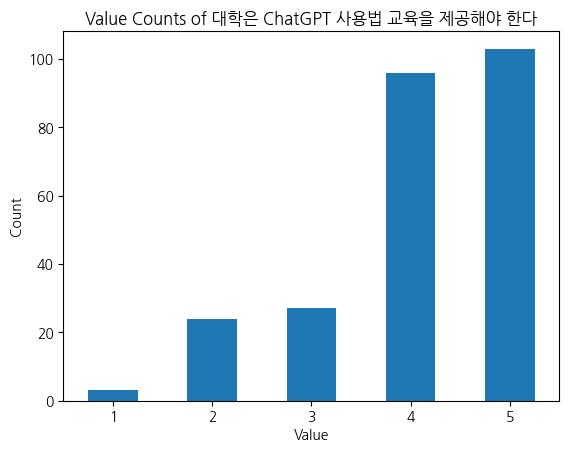

In [37]:
plot_value_counts(df, '대학은 ChatGPT 사용법 교육을 제공해야 한다' )

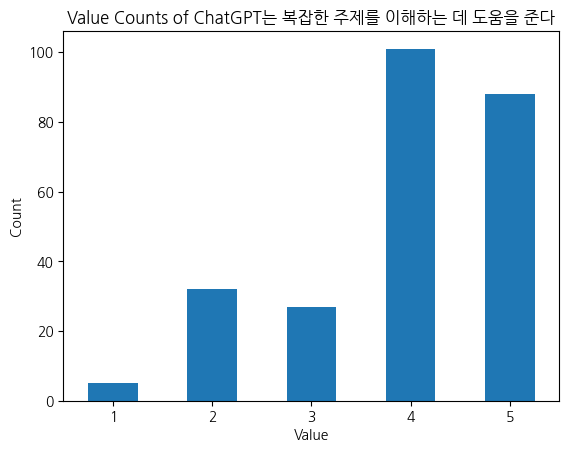

In [38]:
# 'ChatGPT는 복잡한 주제를 이해하는 데 도움을 준다', '공부할때 ChatGPT를 사용하는 것이 편안하다',
plot_value_counts(df, 'ChatGPT는 복잡한 주제를 이해하는 데 도움을 준다' )

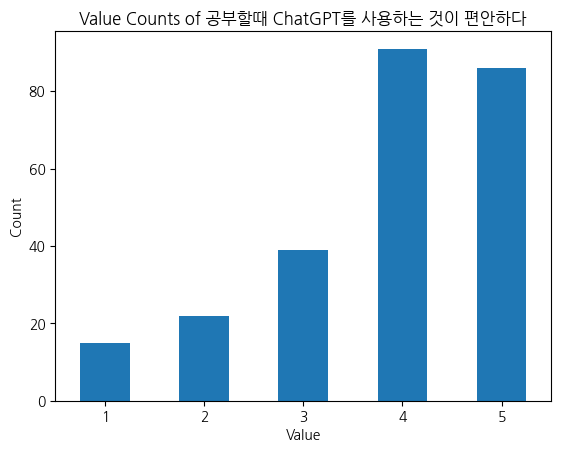

In [39]:
plot_value_counts(df, '공부할때 ChatGPT를 사용하는 것이 편안하다' )

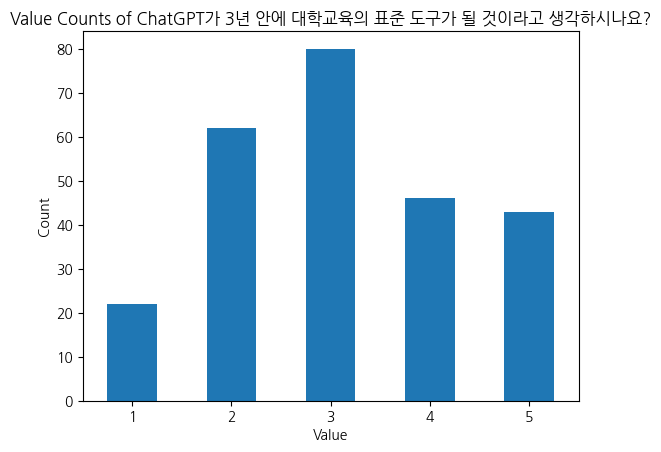

In [40]:
plot_value_counts(df,  'ChatGPT가 3년 안에 대학교육의 표준 도구가 될 것이라고 생각하시나요?' )

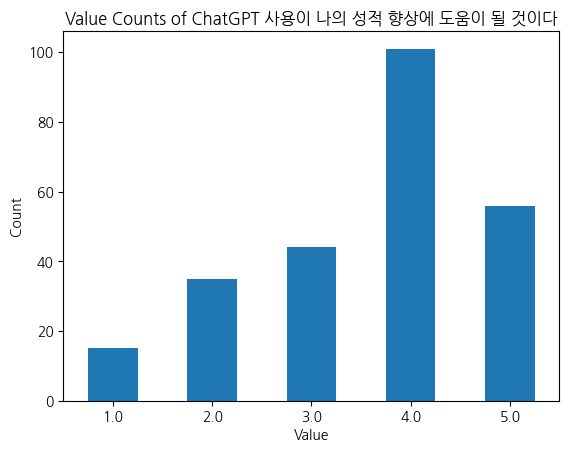

In [41]:
plot_value_counts(df,'ChatGPT 사용이 나의 성적 향상에 도움이 될 것이다' )

In [42]:
words = []
for item in df['ChatGPT를 어떤 목적으로 유용하게 사용하셨나요?']:
    item = item.strip("[]")  # 대괄호 제거
    words.extend(item.split(", "))  # 쉼표를 기준으로 단어 분리

<Axes: ylabel='0'>

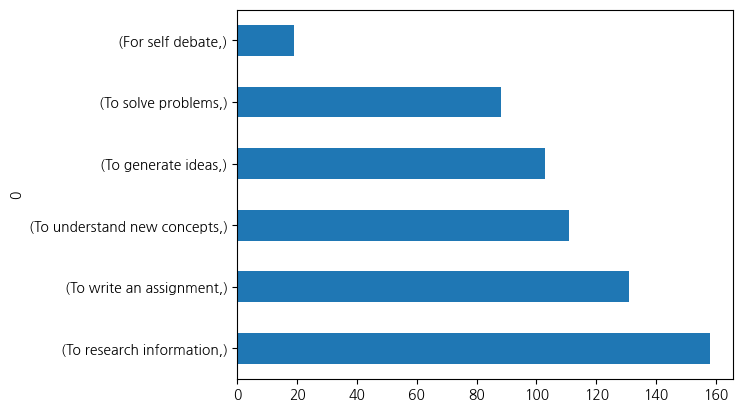

In [43]:
pd.DataFrame(words).value_counts()[:6].plot.barh()

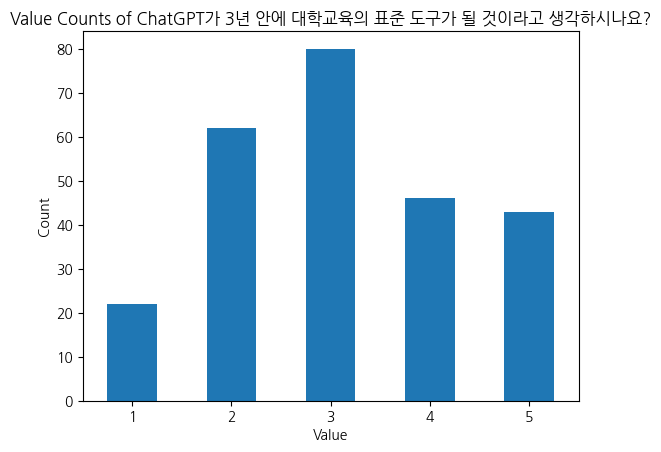

In [44]:
plot_value_counts(df,  'ChatGPT가 3년 안에 대학교육의 표준 도구가 될 것이라고 생각하시나요?' )

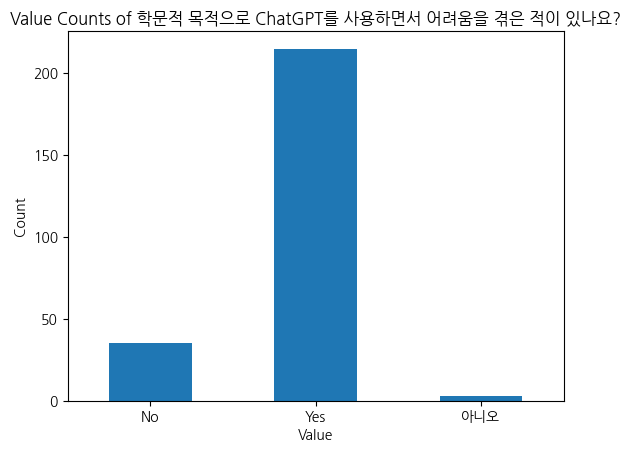

In [45]:
       , '있다면, 그 어려움은 무엇인가요?',
plot_value_counts(df,  '학문적 목적으로 ChatGPT를 사용하면서 어려움을 겪은 적이 있나요?' )

<Axes: >

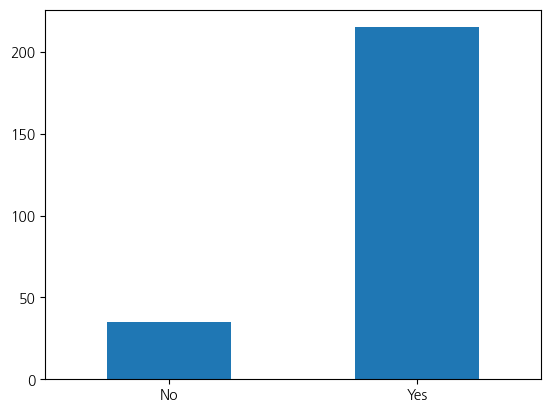

In [46]:
df['학문적 목적으로 ChatGPT를 사용하면서 어려움을 겪은 적이 있나요?'].value_counts().sort_index()[:2].plot.bar(rot=0)

In [47]:
words = []
for item in df['있다면, 그 어려움은 무엇인가요?'].dropna():
    item = item.strip("[]")  # 대괄호 제거
    words.extend(item.split(", "))  # 쉼표를 기준으로 단어 분리

<Axes: ylabel='0'>

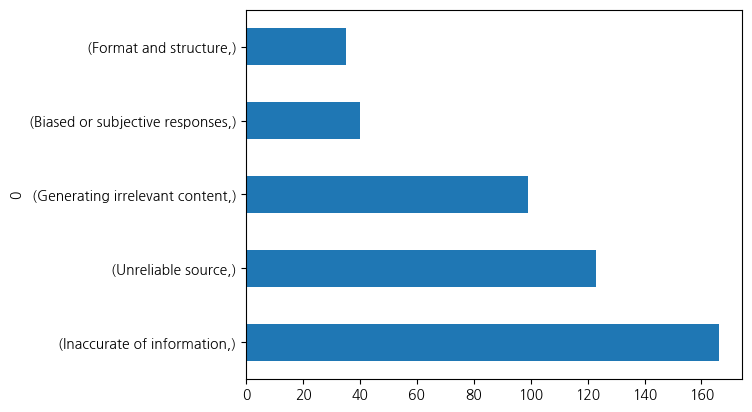

In [48]:
pd.DataFrame(words).value_counts()[:5].plot.barh()

In [49]:
df['있다면, 그 어려움은 무엇인가요?'].dropna()

0                              Inaccurate of information
1                          Generating irrelevant content
3                              Inaccurate of information
4                              Inaccurate of information
5      Inaccurate of information, Generating irreleva...
                             ...                        
248         Inaccurate of information, Unreliable source
249    Inaccurate of information, Generating irreleva...
250         Inaccurate of information, Unreliable source
251         Inaccurate of information, Unreliable source
252         Inaccurate of information, Unreliable source
Name: 있다면, 그 어려움은 무엇인가요?, Length: 231, dtype: object

In [50]:
words = []
for item in df['왜 ChatGPT를 사용하시나요?'].dropna():
    item = item.strip("[]")  # 대괄호 제거
    words.extend(item.split(", "))  # 쉼표를 기준으로 단어 분리

<Axes: ylabel='0'>

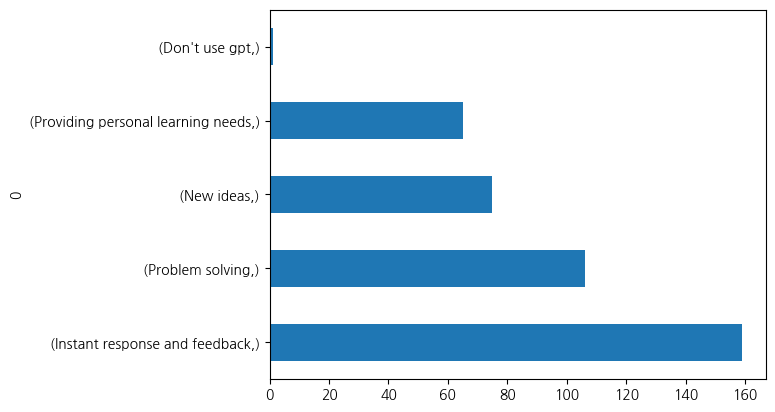

In [51]:
pd.DataFrame(words).value_counts()[:5].plot.barh()

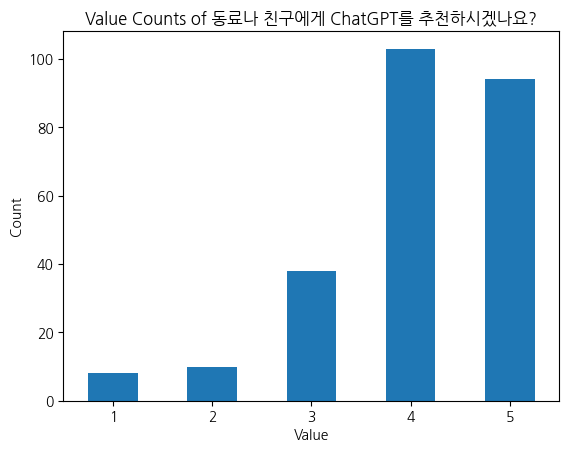

In [52]:
plot_value_counts(df,  '동료나 친구에게 ChatGPT를 추천하시겠나요?', )

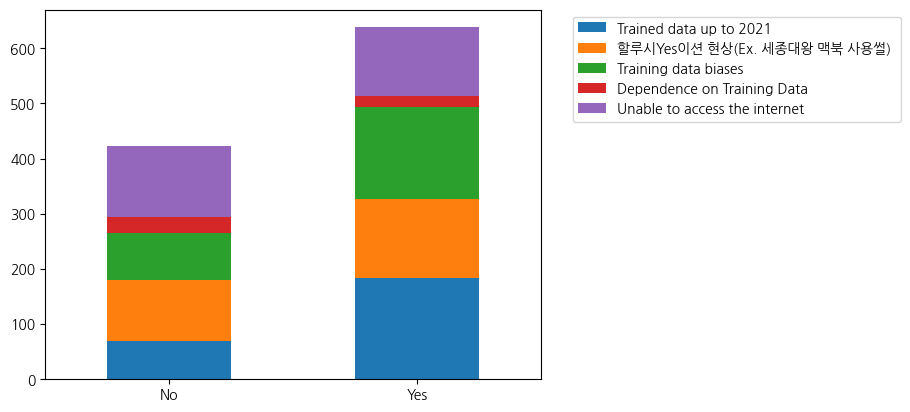

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import re

selected_columns = df.columns[df.columns.str.contains('ChatGPT의 문제점을 모두')]

# 각 열에 대한 빈도수를 데이터프레임으로 변환
df_counts = pd.DataFrame({col: df[col].value_counts() for col in selected_columns})

# 누적 막대 그래프 그리기
ax = df_counts.plot(kind='bar', stacked=True, rot=0)

# 범례 레이블 수정 - 대괄호 안의 값만 추출
labels = [re.search(r'\[(.*)\]', col).group(1) if re.search(r'\[(.*)\]', col) else col for col in selected_columns]

# 그래프 바깥에 범례 위치시키기
ax.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

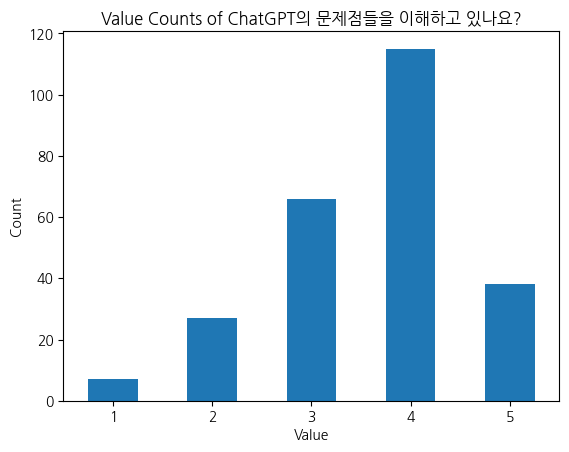

In [54]:
plot_value_counts(df,  'ChatGPT의 문제점들을 이해하고 있나요?')

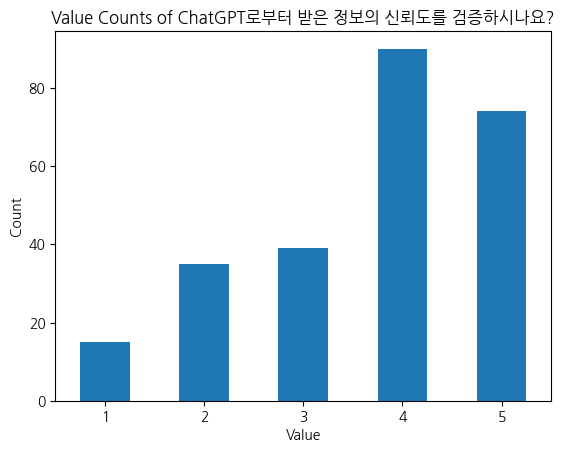

In [55]:
plot_value_counts(df,  'ChatGPT로부터 받은 정보의 신뢰도를 검증하시나요?')

<Axes: >

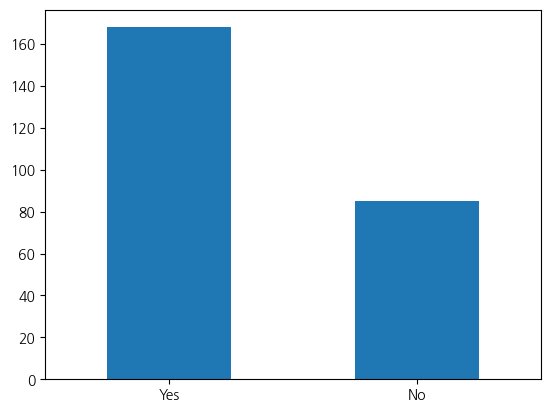

In [56]:
df['ChatGPT로부터 받은 정보를 다른 출처와 비교 검증하시나요?'].value_counts().plot.bar(rot=0)

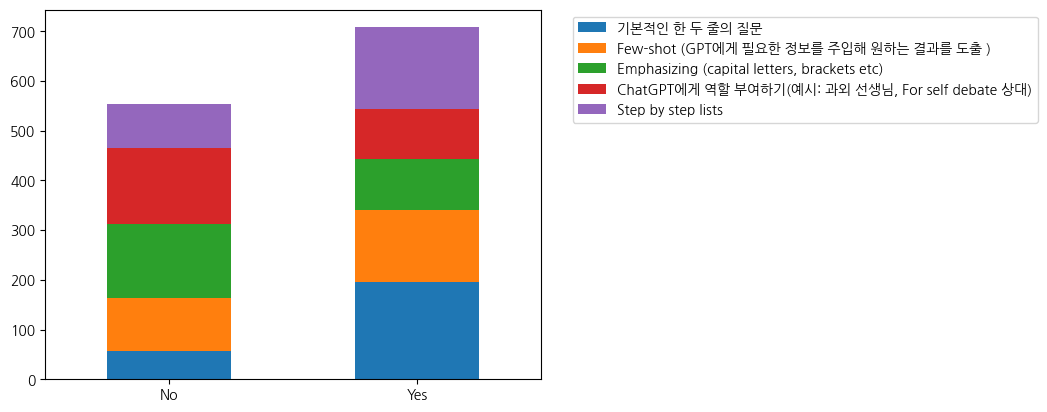

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import re

selected_columns = df.columns[df.columns.str.contains('어떻게 ChatGPT에 질문하시나요?')]

# 각 열에 대한 빈도수를 데이터프레임으로 변환
df_counts = pd.DataFrame({col: df[col].value_counts() for col in selected_columns})
df_counts = df_counts.iloc[:2,:]

# 누적 막대 그래프 그리기
ax = df_counts.plot(kind='bar', stacked=True, rot=0)

# 범례 레이블 수정 - 대괄호 안의 값만 추출
labels = [re.search(r'\[(.*)\]', col).group(1) if re.search(r'\[(.*)\]', col) else col for col in selected_columns]

# 그래프 바깥에 범례 위치시키기
ax.legend(labels, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

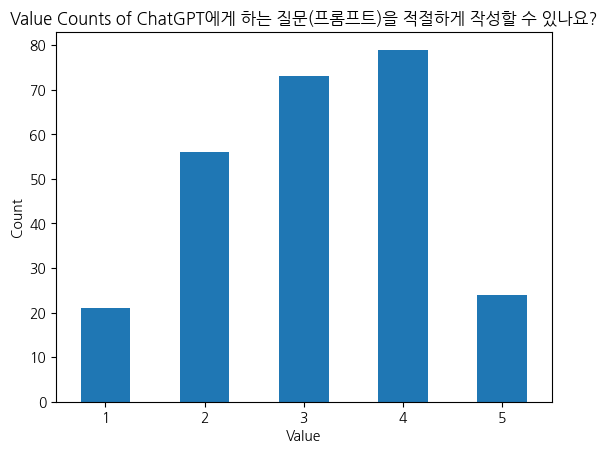

In [58]:
plot_value_counts(df,  'ChatGPT에게 하는 질문(프롬프트)을 적절하게 작성할 수 있나요?')

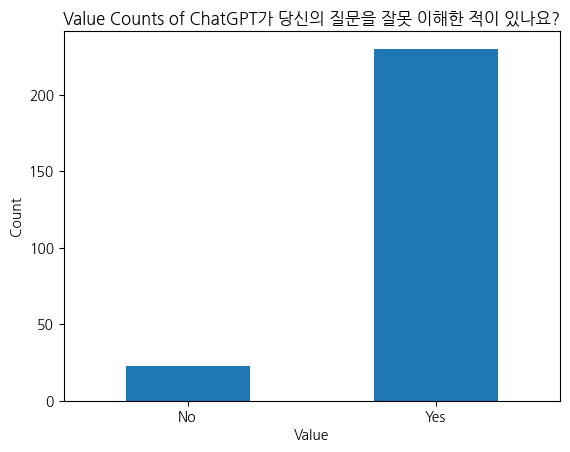

In [59]:
plot_value_counts(df,  'ChatGPT가 당신의 질문을 잘못 이해한 적이 있나요?')

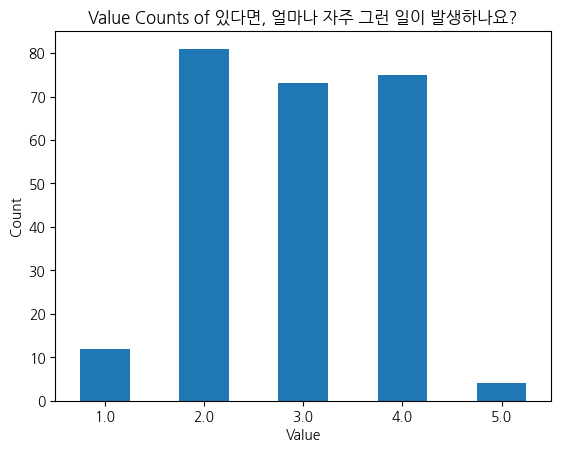

In [60]:
plot_value_counts(df,  '있다면, 얼마나 자주 그런 일이 발생하나요?')

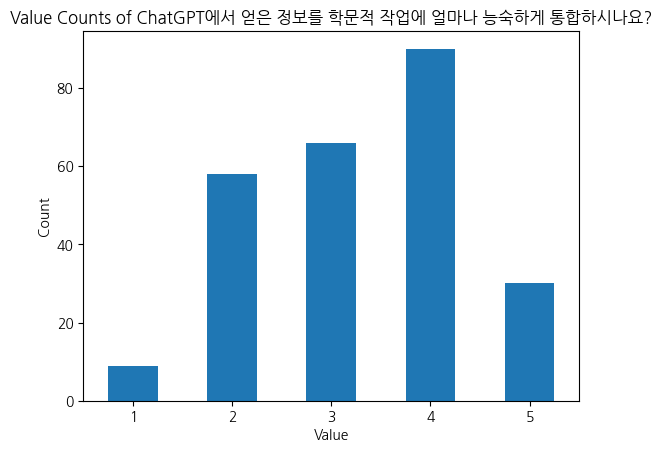

In [61]:
plot_value_counts(df,  'ChatGPT에서 얻은 정보를 학문적 작업에 얼마나 능숙하게 통합하시나요?') 

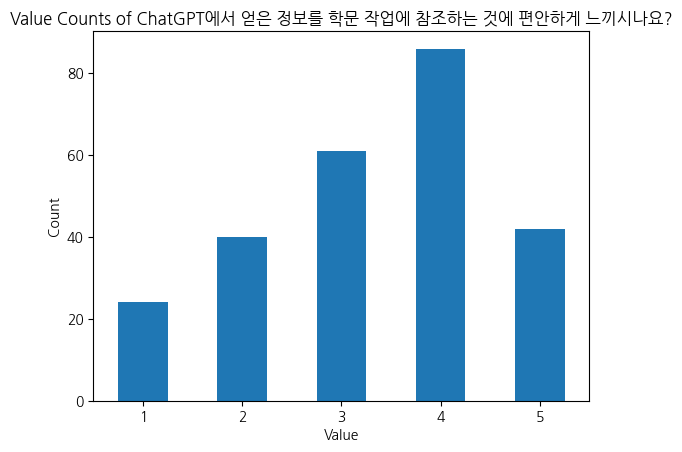

In [62]:
plot_value_counts(df,  'ChatGPT에서 얻은 정보를 학문 작업에 참조하는 것에 편안하게 느끼시나요?') 

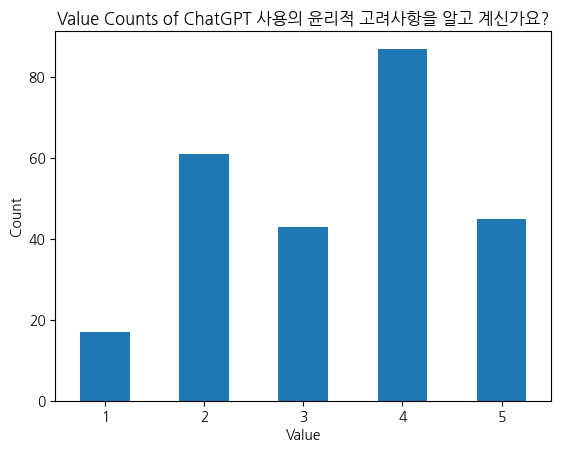

In [63]:
plot_value_counts(df,  'ChatGPT 사용의 윤리적 고려사항을 알고 계신가요?') 

In [64]:
words = []
for item in df['어떤 Ethical issue를 인지하고 계신가요?'].dropna():
    item = item.strip("[]")  # 대괄호 제거
    words.extend(item.split(", "))  # 쉼표를 기준으로 단어 분리

<Axes: ylabel='0'>

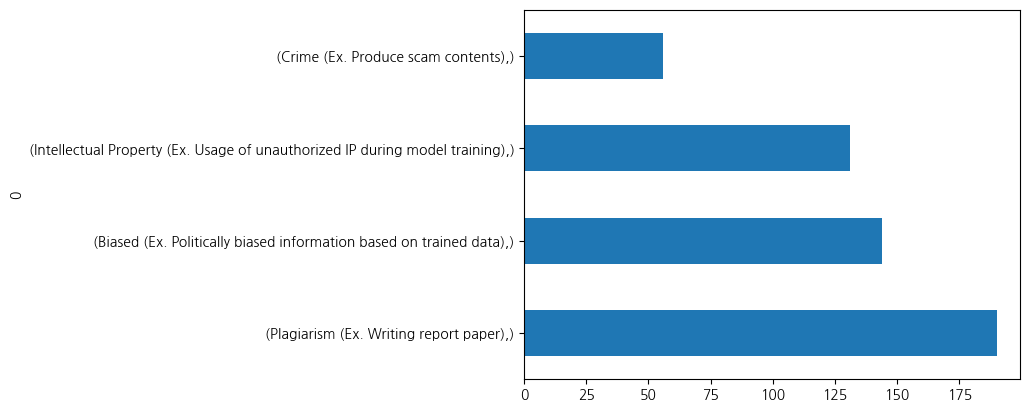

In [65]:
pd.DataFrame(words).value_counts()[:4].plot.barh()

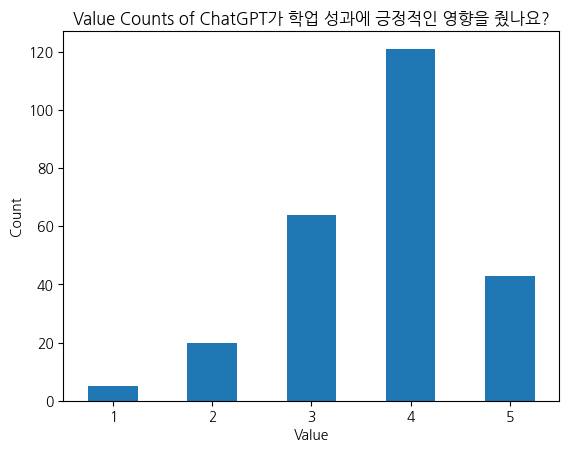

In [66]:
plot_value_counts(df,'ChatGPT가 학업 성과에 긍정적인 영향을 줬나요?')

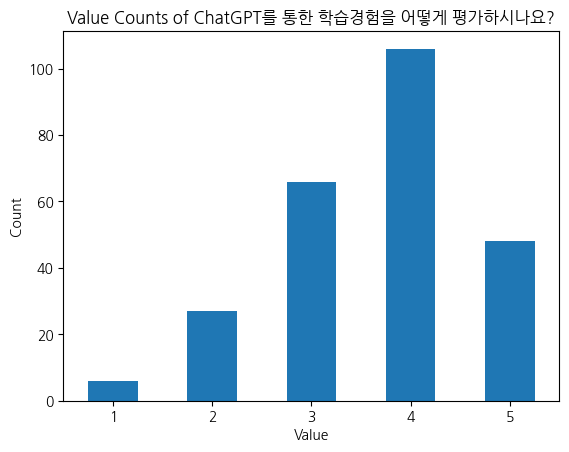

In [67]:
plot_value_counts(df,'ChatGPT를 통한 학습경험을 어떻게 평가하시나요?')

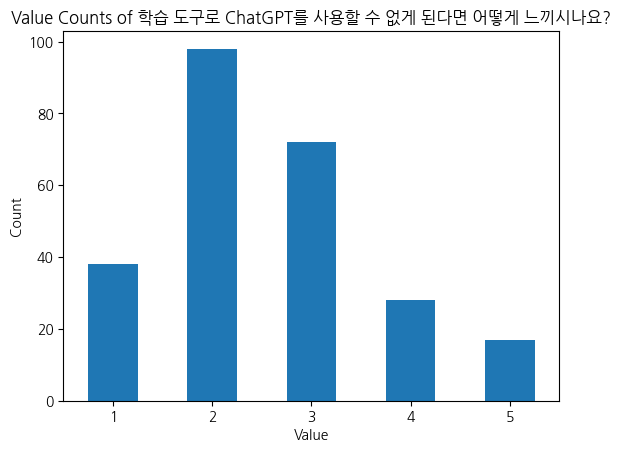

In [68]:
plot_value_counts(df, '학습 도구로 ChatGPT를 사용할 수 없게 된다면 어떻게 느끼시나요?')

### After Feed back

In [69]:
df.columns

Index(['현재 몇학년이신가요? (4학년 이상은 4학년에 체크)', '학부는 어디인가요?', 'Unnamed: 2',
       '어느 도시에서 공부하고 있나요?', '나라 레이블', '당신의 도시나 나라에서 ChatGPT는 금지되었나요?',
       '대학에서 ChatGPT 사용이 금지되었나요?', 'ChatGPT 사용에 익숙하신가요?',
       '학문적 작업에 ChatGPT를 사용해본 적이 있나요?', '주당 공부 시간은 얼마나 되나요?',
       'ChatGPT를 제외한 공부 도구 중 가장 자주 사용하는 것은 무엇인가요?', '그 도구의 단점은 무엇인가요?',
       '공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [집중도 향상]',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [효율적인 학습]',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [창의력]',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [동기부여]',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [시간절약]',
       '다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Being overdependent]',
       '다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Lack of creativity]',
       '다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Induce laziness or deteriorate motivation]',
  

In [114]:
time_df = df[['주당 공부 시간은 얼마나 되나요?', '학문적 작업에 ChatGPT를 사용해본 적이 있나요?']]
time_df.columns = ['Study time per week', 'Usage of ChatGPT']

In [116]:
time_df = time_df.groupby('Usage of ChatGPT')['Study time per week'].value_counts().unstack().fillna(0)

In [118]:
time_df = time_df[['Less than 10 hours', 'Between 10 - 20 hours', 'Between 20 - 30 hours','Between 30 - 40 hours', 'More than 50 hours']]

In [119]:
time_df = time_df/253

In [121]:
time_df.style.background_gradient(axis=None, cmap='Purples').format(precision=3)

Study time per week,Less than 10 hours,Between 10 - 20 hours,Between 20 - 30 hours,Between 30 - 40 hours,More than 50 hours
Usage of ChatGPT,,,,,
1,0.036,0.043,0.008,0.000,0.004
2,0.020,0.040,0.024,0.028,0.004
3,0.055,0.079,0.043,0.012,0.012
4,0.075,0.107,0.059,0.091,0.012
5,0.016,0.091,0.075,0.040,0.024


In [74]:
df['주당 공부 시간은 얼마나 되나요?'].value_counts()

Between 10 - 20 hours    91
Between 20 - 30 hours    53
Less than 10 hours       51
Between 30 - 40 hours    43
More than 50 hours       14
                          1
Name: 주당 공부 시간은 얼마나 되나요?, dtype: int64

In [75]:
df['학문적 작업에 ChatGPT를 사용해본 적이 있나요?'].count()

253

In [91]:
df_temp1 = df[['학문적 작업에 ChatGPT를 사용해본 적이 있나요?', '기존 온라인 검색에 비해 ChatGPT는 시간을 더 절약해준다']]
df_temp1.columns = ['Usage of ChatGPT', 'ChatGPT saves time']

In [92]:
df_time_use = df_temp1.groupby('Usage of ChatGPT')['ChatGPT saves time'].value_counts().unstack().fillna(0)

In [94]:
df_time_use = df_time_use/253

In [105]:
df_time_use = df_time_use.round(3)

In [107]:
df_time_use.style.background_gradient(axis=None, cmap='Purples').format(precision=3)

ChatGPT saves time,1,2,3,4,5
Usage of ChatGPT,,,,,
1,0.000,0.012,0.028,0.040,0.012
2,0.004,0.004,0.020,0.055,0.032
3,0.000,0.028,0.016,0.115,0.047
4,0.000,0.028,0.036,0.162,0.119
5,0.000,0.008,0.004,0.063,0.170


In [108]:
df_score_use = df[['기존 온라인 검색에 비해 ChatGPT는 시간을 더 절약해준다', 'ChatGPT가 학업 성과에 긍정적인 영향을 줬나요?' ]]
df_score_use.columns = ['ChatGPT saves time', 'ChatGPT benefits academics']

In [109]:
df_score_use = df_score_use.value_counts().unstack().fillna(0)

In [110]:
df_score_use = df_score_use/253

In [112]:
df_score_use.style.background_gradient(axis=None, cmap='Purples').format(precision=3)

ChatGPT benefits academics,1,2,3,4,5
ChatGPT saves time,,,,,
1,0.000,0.000,0.004,0.000,0.000
2,0.004,0.012,0.032,0.024,0.008
3,0.008,0.012,0.047,0.028,0.008
4,0.004,0.040,0.119,0.237,0.036
5,0.004,0.016,0.051,0.190,0.119


## GPT 사용 빈도 X GPT 사용방법 잘쓰는지
## GPT training에 해당되는 column 값 
'ChatGPT에게 하는 질문(프롬프트)을 적절하게 작성할 수 있나요?',
'ChatGPT가 당신의 질문을 잘못 이해한 적이 있나요?',
'있다면, 얼마나 자주 그런 일이 발생하나요?',
'ChatGPT에서 얻은 정보를 학문적 작업에 얼마나 능숙하게 통합하시나요?',
'ChatGPT에서 얻은 정보를 학문 작업에 참조하는 것에 편안하게 느끼시나요?',
'ChatGPT 사용의 윤리적 고려사항을 알고 계신가요?', '어떤 Ethical issue를 인지하고 계신가요?',
'ChatGPT가 학업 성과에 긍정적인 영향을 줬나요?', 'ChatGPT를 통한 학습경험을 어떻게 평가하시나요?'

In [122]:
df_understand = df[['학문적 작업에 ChatGPT를 사용해본 적이 있나요?', 'ChatGPT에게 하는 질문(프롬프트)을 적절하게 작성할 수 있나요?','ChatGPT에서 얻은 정보를 학문적 작업에 얼마나 능숙하게 통합하시나요?', 'ChatGPT에서 얻은 정보를 학문 작업에 참조하는 것에 편안하게 느끼시나요?', 'ChatGPT 사용의 윤리적 고려사항을 알고 계신가요?']]
df_understand.columns = ['Used ChatGPT in academics?', 'Can write good ChatGPT prompts?', "Can use ChatGPT's info in academics well?", "Comfortable using ChatGPT in academics?", "Know ChatGPT's ethical considerations?"]

In [125]:
purples = sns.color_palette("Purples",12)

<Axes: >

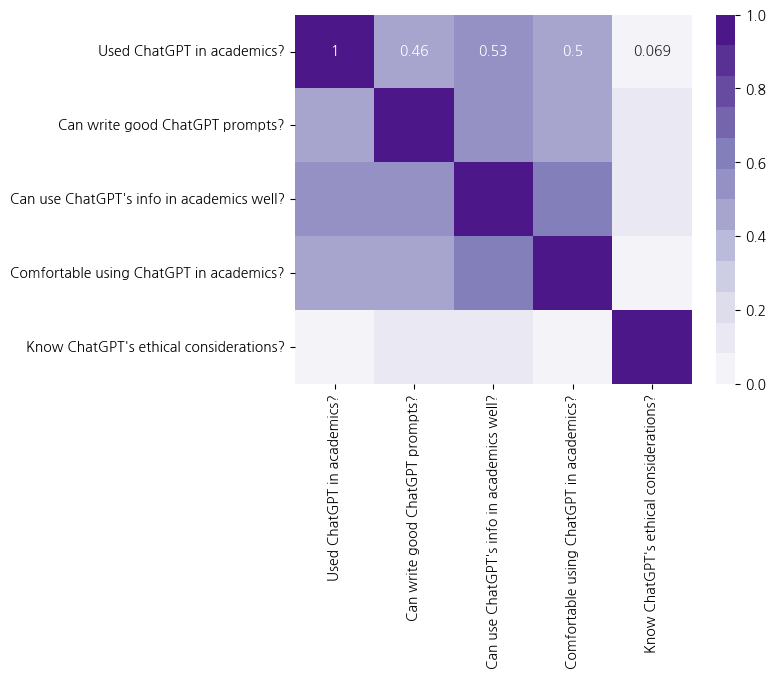

In [126]:
sns.heatmap(df_understand.corr(), annot=True, cmap=purples)

### ChatGPT 사용 방법에 대해 아는 사람의 비율

In [55]:
df_know_method = df[['어떻게 ChatGPT에 질문하시나요? [기본적인 한 두 줄의 질문]',
    '어떻게 ChatGPT에 질문하시나요? [Few-shot (GPT에게 필요한 정보를 주입해 원하는 결과를 도출 )]',
    '어떻게 ChatGPT에 질문하시나요? [Emphasizing (capital letters, brackets etc)]',
    '어떻게 ChatGPT에 질문하시나요? [ChatGPT에게 역할 부여하기(예시: 과외 선생님, For self debate 상대)]',
    '어떻게 ChatGPT에 질문하시나요? [Step by step lists ]']]

In [56]:
df_know_method['Yes_Ratio'] = df_know_method.apply(lambda row: (row == 'Yes').sum() / (row != 'N').sum(), axis=1)

/var/folders/yq/x6k6x6pn1799dnrdtwkc2y3c0000gn/T/ipykernel_25495/791991521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_know_method['Yes_Ratio'] = df_know_method.apply(lambda row: (row == 'Yes').sum() / (row != 'N').sum(), axis=1)


In [57]:
df_know_method['Yes_Ratio']

0      0.6
1      1.0
2      0.6
3      0.4
4      0.6
      ... 
248    0.2
249    0.2
250    0.2
251    0.4
252    0.2
Name: Yes_Ratio, Length: 253, dtype: float64

In [58]:
## 익숙하다고 생각한 사람들의 평균값
temp = pd.concat([df['ChatGPT 사용에 익숙하신가요?'], df_know_method['Yes_Ratio']], axis=1)
temp.head()

,ChatGPT 사용에 익숙하신가요?,Yes_Ratio
0,Yes,0.6
1,Yes,1.0
2,No,0.6
3,Yes,0.4
4,Yes,0.6


In [60]:
# ChatGPT 사용 방법의 비율 중 익숙한 사람과 익숙하지 않은 사람을 나누어서 평균을 구함 
pd.DataFrame(temp.groupby('ChatGPT 사용에 익숙하신가요?')['Yes_Ratio'].mean())

,Yes_Ratio
ChatGPT 사용에 익숙하신가요?,
No,0.491954
Yes,0.595181


In [62]:
temp2 = pd.concat([df['학문적 작업에 ChatGPT를 사용해본 적이 있나요?'], df_know_method['Yes_Ratio']], axis=1)
temp2.head()

,학문적 작업에 ChatGPT를 사용해본 적이 있나요?,Yes_Ratio
0,4,0.6
1,5,1.0
2,1,0.6
3,5,0.4
4,5,0.6


In [63]:
# ChatGPT 사용 빈도에 따라 ChatGPT의 사용방법이 익숙한 사람들의 비율이 증가함 
pd.DataFrame(temp2.groupby('학문적 작업에 ChatGPT를 사용해본 적이 있나요?')['Yes_Ratio'].mean())

,Yes_Ratio
학문적 작업에 ChatGPT를 사용해본 적이 있나요?,
1,0.400000
2,0.489655
3,0.526923
4,0.583908
5,0.645161


### chatGPT가 익숙하지 않은 사람이 잘못된 답변을 받는경우(특이)

In [65]:
# chatgpt의 사용이 익숙지 않은 사람일 수록 잘못이해한적이 많다. 즉, 익숙하지 않으면 잘못된 정보를 출력하는지도 모름? 
pd.DataFrame(df[['ChatGPT 사용에 익숙하신가요?', 'ChatGPT가 당신의 질문을 잘못 이해한 적이 있나요?']].groupby('ChatGPT 사용에 익숙하신가요?')['ChatGPT가 당신의 질문을 잘못 이해한 적이 있나요?'].count())

,ChatGPT가 당신의 질문을 잘못 이해한 적이 있나요?
ChatGPT 사용에 익숙하신가요?,
No,87
Yes,166


In [68]:
## 이번에도 사용량이 많을 수록 잘못 이해한 적이 있다고 답변한 경우가 많음 
pd.DataFrame(df[['학문적 작업에 ChatGPT를 사용해본 적이 있나요?', 'ChatGPT가 당신의 질문을 잘못 이해한 적이 있나요?']].groupby('학문적 작업에 ChatGPT를 사용해본 적이 있나요?')['ChatGPT가 당신의 질문을 잘못 이해한 적이 있나요?'].count())

,ChatGPT가 당신의 질문을 잘못 이해한 적이 있나요?
학문적 작업에 ChatGPT를 사용해본 적이 있나요?,
1,23
2,29
3,52
4,87
5,62


In [69]:
## 결론 : 지피티의 사용 경험이 많은 사람일 수록 잘못 답변 받는 경우가 많음. 따라서 training이 필요함 

## 윤리의식

In [70]:
df[['ChatGPT에게 하는 질문(프롬프트)을 적절하게 작성할 수 있나요?','ChatGPT에서 얻은 정보를 학문적 작업에 얼마나 능숙하게 통합하시나요?', 'ChatGPT에서 얻은 정보를 학문 작업에 참조하는 것에 편안하게 느끼시나요?', 'ChatGPT 사용의 윤리적 고려사항을 알고 계신가요?']]

,ChatGPT에게 하는 질문(프롬프트)을 적절하게 작성할 수 있나요?,ChatGPT에서 얻은 정보를 학문적 작업에 얼마나 능숙하게 통합하시나요?,ChatGPT에서 얻은 정보를 학문 작업에 참조하는 것에 편안하게 느끼시나요?,ChatGPT 사용의 윤리적 고려사항을 알고 계신가요?
0,3,4,4,2
1,5,5,5,5
2,2,3,3,4
3,4,4,1,2
4,2,3,4,2
...,...,...,...,...
248,5,5,5,4
249,4,5,5,5
250,3,5,5,4
251,5,5,5,3


In [71]:
df[['학문적 작업에 ChatGPT를 사용해본 적이 있나요?', 'ChatGPT 사용의 윤리적 고려사항을 알고 계신가요?', '어떤 Ethical issue를 인지하고 계신가요?']]

,학문적 작업에 ChatGPT를 사용해본 적이 있나요?,ChatGPT 사용의 윤리적 고려사항을 알고 계신가요?,어떤 Ethical issue를 인지하고 계신가요?
0,4,2,Biased (Ex. Politically biased information bas...
1,5,5,Biased (Ex. Politically biased information bas...
2,1,4,"Plagiarism (Ex. Writing report paper), Intelle..."
3,5,2,Biased (Ex. Politically biased information bas...
4,5,2,"Plagiarism (Ex. Writing report paper), Intelle..."
...,...,...,...
248,5,4,"Plagiarism (Ex. Writing report paper), Intelle..."
249,5,5,Plagiarism (Ex. Writing report paper)
250,5,4,Biased (Ex. Politically biased information bas...
251,5,3,Plagiarism (Ex. Writing report paper)


In [72]:
# ethical issue 인지 비율 
df_ethics = df['어떤 Ethical issue를 인지하고 계신가요?'].astype('str').str.split(',', expand=True)
df_ethics['ratio'] = 1 - df_ethics.isnull().sum(axis=1) / 4
df_ethics

,0,1,2,3,ratio
0,Biased (Ex. Politically biased information bas...,Plagiarism (Ex. Writing report paper),None,None,0.50
1,Biased (Ex. Politically biased information bas...,Plagiarism (Ex. Writing report paper),Crime (Ex. Produce scam contents),Intellectual Property (Ex. Usage of unauthori...,1.00
2,Plagiarism (Ex. Writing report paper),Intellectual Property (Ex. Usage of unauthori...,None,None,0.50
3,Biased (Ex. Politically biased information bas...,Plagiarism (Ex. Writing report paper),None,None,0.50
4,Plagiarism (Ex. Writing report paper),Intellectual Property (Ex. Usage of unauthori...,None,None,0.50
...,...,...,...,...,...
248,Plagiarism (Ex. Writing report paper),Intellectual Property (Ex. Usage of unauthori...,None,None,0.50
249,Plagiarism (Ex. Writing report paper),None,None,None,0.25
250,Biased (Ex. Politically biased information bas...,Intellectual Property (Ex. Usage of unauthori...,None,None,0.50
251,Plagiarism (Ex. Writing report paper),None,None,None,0.25


### 사용경험과 ratio 비율

In [73]:
# 사용경험이 많다고 해서 적다고 해서 윤리의식 비율에는 의미있는 차이는 없다. 다 그냥 어느정도 알고 있는 정도..
temp = pd.concat([df['학문적 작업에 ChatGPT를 사용해본 적이 있나요?'], df_ethics['ratio']], axis=1)
pd.DataFrame(temp.groupby('학문적 작업에 ChatGPT를 사용해본 적이 있나요?')['ratio'].mean())

,ratio
학문적 작업에 ChatGPT를 사용해본 적이 있나요?,
1,0.434783
2,0.543103
3,0.528846
4,0.522989
5,0.520161


In [75]:
## 익숙한 사람들은? -> 역시나 별 차이 없다. 
temp2 = pd.concat([df['ChatGPT 사용에 익숙하신가요?'], df_ethics['ratio']], axis=1)
pd.DataFrame(temp2.groupby('ChatGPT 사용에 익숙하신가요?')['ratio'].mean())

,ratio
ChatGPT 사용에 익숙하신가요?,
No,0.500000
Yes,0.527108


## GPT 사용경험이 많은 사람들이 꼽은 단점은?

In [76]:
## gpt 사용 경험이 많다의 기준을 4점이상으로 선정 
df_over_4 = df[df['학문적 작업에 ChatGPT를 사용해본 적이 있나요?'] >= 4]

In [77]:
df_over_4 = df_over_4[['다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Being overdependent]',
       '다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Lack of creativity]',
       '다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Induce laziness or deteriorate motivation]',
       '다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Reduce self-accomplishment and improvement]',
       '다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Ethical issue]',
       '다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Impersonal learning experience]']]

In [78]:
# calculate mean for each column
mean_values = df_over_4.mean()

# rank the mean values
ranked_means = mean_values.sort_values(ascending=False)

print(ranked_means)

다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Being overdependent]                           3.617450
다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Induce laziness or deteriorate motivation]     3.463087
다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Lack of creativity]                            3.348993
다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Impersonal learning experience]                3.060403
다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Reduce self-accomplishment and improvement]    2.899329
다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Ethical issue]                                 2.812081
dtype: float64


<Axes: >

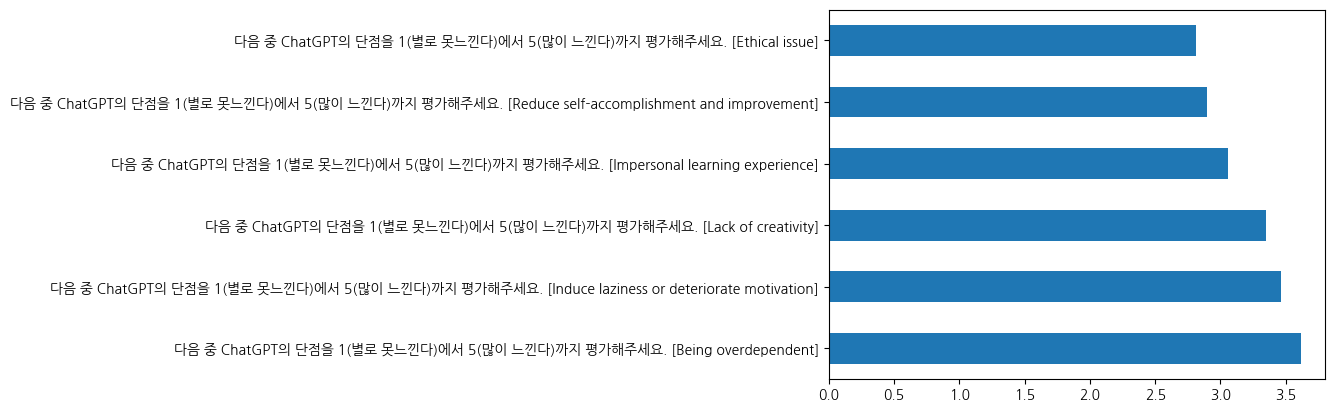

In [79]:
ranked_means.plot.barh(rot=0)

In [80]:
df.columns

Index(['현재 몇학년이신가요? (4학년 이상은 4학년에 체크)', '학부는 어디인가요?', 'Unnamed: 2',
       '어느 도시에서 공부하고 있나요?', '나라 레이블', '당신의 도시나 나라에서 ChatGPT는 금지되었나요?',
       '대학에서 ChatGPT 사용이 금지되었나요?', 'ChatGPT 사용에 익숙하신가요?',
       '학문적 작업에 ChatGPT를 사용해본 적이 있나요?', '주당 공부 시간은 얼마나 되나요?',
       'ChatGPT를 제외한 공부 도구 중 가장 자주 사용하는 것은 무엇인가요?', '그 도구의 단점은 무엇인가요?',
       '공부 이외의 목적으로 ChatGPT를 가장 많이 사용하는 이유는 무엇인가요?',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [집중도 향상]',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [효율적인 학습]',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [창의력]',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [동기부여]',
       '다음 중 ChatGPT의 장점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [시간절약]',
       '다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Being overdependent]',
       '다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Lack of creativity]',
       '다음 중 ChatGPT의 단점을 1(별로 못느낀다)에서 5(많이 느낀다)까지 평가해주세요. [Induce laziness or deteriorate motivation]',
  

## 문제를 인지하고 있는 사람이 문제점을 알고 있는 비율

In [81]:
df_problem = df[['알고 있던 ChatGPT의 문제점을 모두 체크해 주세요 [Trained data up to 2021 ]',
       '알고 있던 ChatGPT의 문제점을 모두 체크해 주세요 [할루시Yes이션 현상(Ex. 세종대왕 맥북 사용썰) ]',
       '알고 있던 ChatGPT의 문제점을 모두 체크해 주세요 [Training data biases]',
       '알고 있는 ChatGPT의 문제점을 모두 체크해 주세요 [Dependence on Training Data]',
       '알고 있던 ChatGPT의 문제점을 모두 체크해 주세요 [Unable to access the internet]',
       'ChatGPT의 문제점들을 이해하고 있나요?']]

In [82]:
df_problem = df_problem.fillna('No')

In [83]:
df_problem['yes_ratio'] = df_problem.apply(lambda row: (row == 'Yes').sum() / (row != 'N').sum(), axis=1)

In [85]:
# GPT의 사용경험이 많을 수록 문제를 더 잘 인식하고 있지만 반대로 생각해 보면 사용경험이 가장 많은 사람들은 4가지 문제점 중 2가지 밖에 인지하지
# 못한다는 것이 팩트 
temp = pd.concat([df['학문적 작업에 ChatGPT를 사용해본 적이 있나요?'],df_problem['yes_ratio']], axis=1)
pd.DataFrame(temp.groupby('학문적 작업에 ChatGPT를 사용해본 적이 있나요?')['yes_ratio'].mean())

,yes_ratio
학문적 작업에 ChatGPT를 사용해본 적이 있나요?,
1,0.217391
2,0.379310
3,0.403846
4,0.440613
5,0.500000
